In [1]:
# imports...
import pandas as pd
import numpy as np
import os
from scipy import stats
# visualize
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(11, 9))
plt.rc('font', size=13)
# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")
# acquire
from env import host, user, password
from pydataset import data
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
# my fancy docs
import acquire
import prepare
import explore
import model_func
import mf

In [2]:
# need to convert

## Exercises
Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:

In [3]:
# positive: survives
# negative: dies
# TP: predict survival, and the passenger actually survived
# TN: predict death, and passenger actually died
# FN: predict death, but passenger actually survived
# FP: predict survival, but passenger actually died

In [4]:
# lets bring in the data set
# titanic_df = acquire.new_titanic_data()
# now let's prep it
train, validate, test = prepare.prep_titanic_data(acquire.new_titanic_data(), column = 'age', method = 'median', dummies = ['embarked', 'sex'])
# split it
# train, validate, test = prepare.titanic_split(titanic_df)
# what do they look like?
train.shape, validate.shape, test.shape

((498, 11), (214, 11), (179, 11))

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 583 to 744
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  498 non-null    int64  
 1   survived      498 non-null    int64  
 2   pclass        498 non-null    int64  
 3   age           498 non-null    float64
 4   sibsp         498 non-null    int64  
 5   parch         498 non-null    int64  
 6   fare          498 non-null    float64
 7   alone         498 non-null    int64  
 8   embarked_Q    498 non-null    uint8  
 9   embarked_S    498 non-null    uint8  
 10  sex_male      498 non-null    uint8  
dtypes: float64(2), int64(6), uint8(3)
memory usage: 36.5 KB


In [6]:
X_train, y_train = train.drop(columns='survived'), train.survived
X_validate, y_validate = validate.drop(columns='survived'), validate.survived
X_test, y_test = test.drop(columns='survived'), test.survived

In [7]:
# i want to see relationships between each column and 'survived'
# 'pclass' - chi2
observed1 = pd.crosstab(train.survived, train.pclass)
chi2, p, degf, expected = stats.chi2_contingency(observed1)
print('     pclass')
print('')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
print('------------------------------------')
# 'sibsp' - chi2
observed2 = pd.crosstab(train.survived, train.sibsp)
chi2, p, degf, expected = stats.chi2_contingency(observed2)
print('     sibsp')
print('')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
print('------------------------------------')
# 'parch' - chi2
observed3 = pd.crosstab(train.survived, train.parch)
chi2, p, degf, expected = stats.chi2_contingency(observed3)
print('     parch')
print('')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
print('-------------------------------------')
# 'alone' - chi2
observed4 = pd.crosstab(train.survived, train.alone)
chi2, p, degf, expected = stats.chi2_contingency(observed4)
print('     alone')
print('')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
print('-------------------------------------')
# 'embarked_Q' - chi2
observed5 = pd.crosstab(train.survived, train.embarked_Q)
chi2, p, degf, expected = stats.chi2_contingency(observed5)
print('     embarked_Q')
print('')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
print('-------------------------------------')
# 'embarked_S' - chi2
observed6 = pd.crosstab(train.survived, train.embarked_S)
chi2, p, degf, expected = stats.chi2_contingency(observed6)
print('     embarked_S')
print('')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
print('-------------------------------------')
# 'sex_male' - chi2
observed7 = pd.crosstab(train.survived, train.sex_male)
chi2, p, degf, expected = stats.chi2_contingency(observed7)
print('     sex_male')
print('')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
print('-------------------------------------')

     pclass

chi^2 = 55.2252
p     = 0.0000
------------------------------------
     sibsp

chi^2 = 24.8926
p     = 0.0004
------------------------------------
     parch

chi^2 = 15.4412
p     = 0.0086
-------------------------------------
     alone

chi^2 = 18.1920
p     = 0.0000
-------------------------------------
     embarked_Q

chi^2 = 0.3542
p     = 0.5517
-------------------------------------
     embarked_S

chi^2 = 12.3251
p     = 0.0004
-------------------------------------
     sex_male

chi^2 = 159.2890
p     = 0.0000
-------------------------------------


In [8]:
# can I turn this into a function?

def get_chi(a,b,cat):
    observed = pd.crosstab(a, b)
    chi2, p, degf, expected = stats.chi2_contingency(observed)
    print(f'Train data set chi^2 test results')
    print(f'Comparing survival and {cat}')
    print(f'chi^2 = {chi2:.4f}')
    print(f'p     = {p:.4f}')
    print('------------------------------------')

In [9]:
get_chi(train['survived'], train['pclass'], 'pclass')

Train data set chi^2 test results
Comparing survival and pclass
chi^2 = 55.2252
p     = 0.0000
------------------------------------


In [10]:
# now the continuous...
# 'age'
# 'fare'

# create survival_rate
survival_rate = train['survived'].mean()
# create age variable for ttest
age = train['age']
# ttest for age
alpha = 0.01
t, p = stats.ttest_1samp(age, survival_rate)
print('     age')
print('')
print('tscore:', t.round(2))
print('p/2:   ', p/2)
print('alpha: ', alpha)
print('-------------------------------------')
# create fare variable for ttest
fare = train['fare']
# ttest for fare
t, p = stats.ttest_1samp(fare, survival_rate)
print('     fare')
print('')
print('tscore:', t.round(2))
print('p/2:   ', p/2)
print('alpha: ', alpha)
print('-------------------------------------')

     age

tscore: 49.39
p/2:    3.8085496775045816e-194
alpha:  0.01
-------------------------------------
     fare

tscore: 14.55
p/2:    1.6753909571183626e-40
alpha:  0.01
-------------------------------------


In [11]:
# so which columns do I want to keep for my model?????
# 'sex_male', 'pclass', 'age', 'sibsp'
# and maybe 'alone'

In [12]:
X_cols = ['sex_male', 'pclass', 'age', 'sibsp']
y_col = 'survived'

X_train, y_train = train[X_cols], train[y_col]
X_validate, y_validate = validate[X_cols], validate[y_col]
X_test, y_test = test[X_cols], test[y_col]

In [13]:
# X_train is the DF w/o the 'survived' column
# y_train is the 'survived' column as a Series

1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [14]:
# what is the mode of 'survived'?
y_train.value_counts()
# death wins

0    307
1    191
Name: survived, dtype: int64

In [15]:
# 1. Create the object
baseline = DummyClassifier(strategy='constant', constant=0)
# 2. Fit the object
baseline.fit(X_train, y_train)
# how does it do on training data set?
print('Baseline accuracy: %.4f' % baseline.score(X_train, y_train))

Baseline accuracy: 0.6165


2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [16]:
# let's look w/ default hyperparameters
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [17]:
# how does the DT perform w/ default hyperparameters?
print(f'training score: {tree.score(X_train, y_train):.2%}')
print(f'validate score: {tree.score(X_validate, y_validate):.2%}')

training score: 91.57%
validate score: 77.10%


In [18]:
# what does the tree look like?
print(export_text(tree, feature_names=X_train.columns.tolist(), show_weights=True))

|--- sex_male <= 0.50
|   |--- pclass <= 2.50
|   |   |--- age <= 3.00
|   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |--- age >  3.00
|   |   |   |--- age <= 23.50
|   |   |   |   |--- weights: [0.00, 26.00] class: 1
|   |   |   |--- age >  23.50
|   |   |   |   |--- age <= 27.50
|   |   |   |   |   |--- age <= 26.50
|   |   |   |   |   |   |--- sibsp <= 0.50
|   |   |   |   |   |   |   |--- pclass <= 1.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 3.00] class: 1
|   |   |   |   |   |   |   |--- pclass >  1.50
|   |   |   |   |   |   |   |   |--- weights: [1.00, 1.00] class: 0
|   |   |   |   |   |   |--- sibsp >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 4.00] class: 1
|   |   |   |   |   |--- age >  26.50
|   |   |   |   |   |   |--- weights: [1.00, 1.00] class: 0
|   |   |   |   |--- age >  27.50
|   |   |   |   |   |--- age <= 48.50
|   |   |   |   |   |   |--- weights: [0.00, 43.00] class: 1
|   |   |   |   |   |--- age >  48.50
|   |   |   |   |   

[Text(187.69531250000003, 476.36526315789473, 'X[0] <= 0.5\ngini = 0.473\nsamples = 498\nvalue = [307, 191]'),
 Text(88.86666666666667, 450.61578947368423, 'X[1] <= 2.5\ngini = 0.365\nsamples = 175\nvalue = [42, 133]'),
 Text(33.06666666666667, 424.8663157894737, 'X[2] <= 3.0\ngini = 0.081\nsamples = 94\nvalue = [4, 90]'),
 Text(24.800000000000004, 399.1168421052632, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(41.333333333333336, 399.1168421052632, 'X[2] <= 23.5\ngini = 0.062\nsamples = 93\nvalue = [3, 90]'),
 Text(33.06666666666667, 373.3673684210526, 'gini = 0.0\nsamples = 26\nvalue = [0, 26]'),
 Text(49.60000000000001, 373.3673684210526, 'X[2] <= 27.5\ngini = 0.086\nsamples = 67\nvalue = [3, 64]'),
 Text(33.06666666666667, 347.6178947368421, 'X[2] <= 26.5\ngini = 0.298\nsamples = 11\nvalue = [2, 9]'),
 Text(24.800000000000004, 321.86842105263156, 'X[3] <= 0.5\ngini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(16.533333333333335, 296.11894736842106, 'X[1] <= 1.5\ngini = 0.32\n

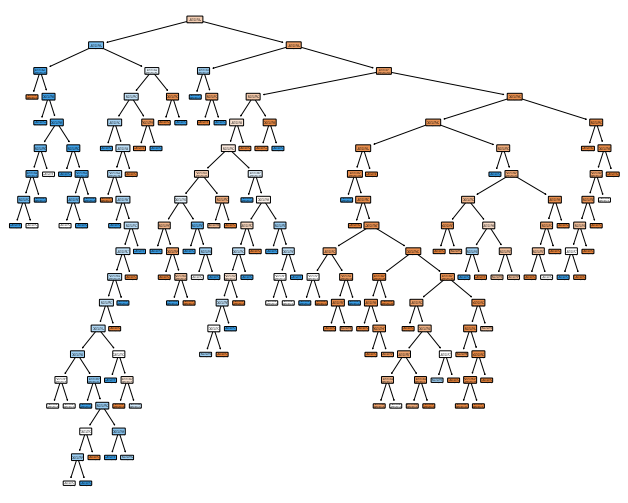

In [19]:
# this is garbage

plot_tree(tree, filled=True, rounded=True)

In [20]:
# now let's dive in and take a close look once we add some hyperparameters



In [21]:
tree1 = DecisionTreeClassifier(max_leaf_nodes=4)
tree1.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=4)

In [22]:
print(f'training score: {tree1.score(X_train, y_train):.2%}')
print(f'validate score: {tree1.score(X_validate, y_validate):.2%}')

training score: 80.72%
validate score: 77.57%


[Text(306.90000000000003, 407.7, 'X[0] <= 0.5\ngini = 0.473\nsamples = 498\nvalue = [307, 191]'),
 Text(153.45000000000002, 244.62, 'X[1] <= 2.5\ngini = 0.365\nsamples = 175\nvalue = [42, 133]'),
 Text(76.72500000000001, 81.53999999999996, 'gini = 0.081\nsamples = 94\nvalue = [4, 90]'),
 Text(230.175, 81.53999999999996, 'gini = 0.498\nsamples = 81\nvalue = [38, 43]'),
 Text(460.35, 244.62, 'X[2] <= 3.5\ngini = 0.295\nsamples = 323\nvalue = [265, 58]'),
 Text(383.62500000000006, 81.53999999999996, 'gini = 0.444\nsamples = 12\nvalue = [4, 8]'),
 Text(537.075, 81.53999999999996, 'gini = 0.27\nsamples = 311\nvalue = [261, 50]')]

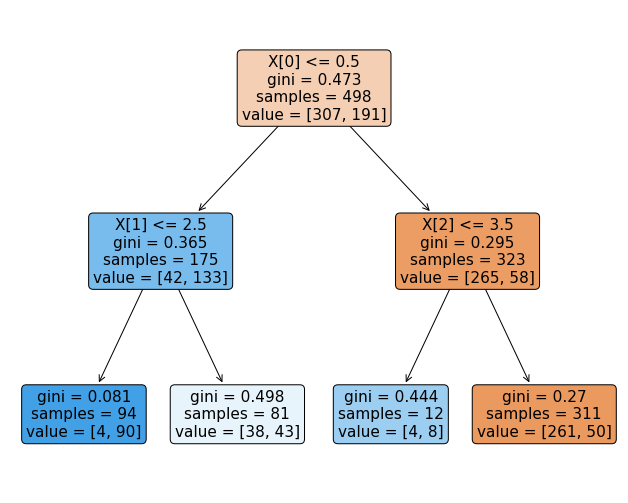

In [23]:
plot_tree(tree1, filled=True, rounded=True)

3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [24]:
print(f'Tree 1 training score: {tree1.score(X_train, y_train):.2%}')
print(f'Tree 1 validate score: {tree1.score(X_validate, y_validate):.2%}')

Tree 1 training score: 80.72%
Tree 1 validate score: 77.57%


4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [25]:
# let's add the predictions to the df

train['prediction'] = tree1.predict(X_train)
train.head()

,passenger_id,survived,pclass,age,sibsp,parch,fare,alone,embarked_Q,embarked_S,sex_male,prediction
583,583,0,1,36.0,0,0,40.1250,1,0,0,1,0
165,165,1,3,9.0,0,2,20.5250,0,0,1,1,0
50,50,0,3,7.0,4,1,39.6875,0,0,1,1,0
259,259,1,2,50.0,0,1,26.0000,0,0,1,0,1
306,306,1,1,28.0,0,0,110.8833,1,0,0,0,1


In [26]:
# confusion matrix
confusion_matrix(train.survived, train.prediction)

array([[261,  46],
       [ 50, 141]])

In [27]:
train['survived'].value_counts()

0    307
1    191
Name: survived, dtype: int64

In [28]:
train.prediction.value_counts()

0    311
1    187
Name: prediction, dtype: int64

In [29]:
pre1_df = pd.DataFrame([['TN', 'FP'],['FN', 'TP']], index=['actual death', 'actual survived'], columns=['pred death', 'pred survived'])

In [30]:
# Carl Sagan went to outer space to find Madeleine's code...
pre1_df + ' : ' + confusion_matrix(train.survived, train.prediction).astype(str)

,pred death,pred survived
actual death,TN : 261,FP : 46
actual survived,FN : 50,TP : 141


In [31]:
# 1st 4 create the variables
tp = 141
tn = 261
fp = 46
fn = 50
# these calculate the rates
tpr = tp/(tp+fn)
fpr = fp/(fp+tn)
tnr = tn/(tn+fp)
fnr = fn/(fn+tp)

In [32]:
# accuracy
accuracy_1 = (train.survived == train.prediction).mean()
# Precision
subset = train[train.prediction == 1]
precision_t1 = (subset.prediction == subset.survived).mean()
# Recall
subset = train[train.survived == 1]
recall_t1 = (subset.prediction == subset.survived).mean()
# f1-score


pd.DataFrame(classification_report(train.survived, train.prediction, output_dict=True)).T

,precision,recall,f1-score,support
0,0.839228,0.850163,0.844660,307.000000
1,0.754011,0.738220,0.746032,191.000000
accuracy,0.807229,0.807229,0.807229,0.807229
macro avg,0.796619,0.794191,0.795346,498.000000
weighted avg,0.806544,0.807229,0.806833,498.000000


In [33]:
print(f'The overall Accuracy is {accuracy_1:.2%}')
print(f'The True Positive rate is {tpr:.2%}')
print(f'The False Positive rate is {fpr:.2%}')
print(f'The True Negative rate is {tnr:.2%}')
print(f'The False Negative rate is {fnr:.2%}')
print(f'Precision for tree 1 is {precision_t1:.2%}')
print(f'Recall for tree 1 is {recall_t1:.2%}')

The overall Accuracy is 80.72%
The True Positive rate is 73.82%
The False Positive rate is 14.98%
The True Negative rate is 85.02%
The False Negative rate is 26.18%
Precision for tree 1 is 75.40%
Recall for tree 1 is 73.82%


In [34]:
classification = classification_report(train.survived, train.prediction, target_names=['Survive', 'Death'])

In [35]:
accuracy = accuracy_score(train.survived, train.prediction)
precision = precision_score(train.survived, train.prediction, pos_label=1)
recall = recall_score(train.survived, train.prediction, pos_label=1)
classification = classification_report(train.survived, train.prediction, output_dict=True)
pd.DataFrame(classification)

,0,1,accuracy,macro avg,weighted avg
precision,0.839228,0.754011,0.807229,0.796619,0.806544
recall,0.850163,0.738220,0.807229,0.794191,0.807229
f1-score,0.844660,0.746032,0.807229,0.795346,0.806833
support,307.000000,191.000000,0.807229,498.000000,498.000000


5. Run through steps 2-4 using a different max_depth value.

In [36]:
tree2 = DecisionTreeClassifier(max_depth=4)
tree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [37]:
print(f'training score: {tree2.score(X_train, y_train):.2%}')
print(f'validate score: {tree2.score(X_validate, y_validate):.2%}')

training score: 84.54%
validate score: 79.44%


In [38]:
train['prediction_2'] = tree2.predict(X_train)

In [39]:
pre2_df = pd.DataFrame([['TN', 'FP'],['FN', 'TP']], index=['actual death', 'actual survived'], columns=['pred_2 death', 'pred_2 survived'])

In [40]:
pre2_df + ' : ' + confusion_matrix(train.survived, train.prediction_2).astype(str)

,pred_2 death,pred_2 survived
actual death,TN : 281,FP : 26
actual survived,FN : 51,TP : 140


In [41]:
tp = 140
tn = 281
fp = 26
fn = 51
tpr = tp/(tp+fn)
fpr = fp/(fp+tn)
tnr = tn/(tn+fp)
fnr = fn/(fn+tp)

In [42]:
# accuracy
accuracy_2 = (train.survived == train.prediction_2).mean()
# Precision
subset = train[train.prediction_2 == 1]
precision_t2 = (subset.prediction_2 == subset.survived).mean()
# Recall
subset = train[train.survived == 1]
recall_t2 = (subset.prediction_2 == subset.survived).mean()
# f1-score


class_report = pd.DataFrame(classification_report(train.survived, train.prediction_2, output_dict=True)).T

In [43]:
class_report = class_report.rename(index={'0': 'Died', '1': 'Survived'})

In [44]:
class_report

,precision,recall,f1-score,support
Died,0.846386,0.915309,0.879499,307.000000
Survived,0.843373,0.732984,0.784314,191.000000
accuracy,0.845382,0.845382,0.845382,0.845382
macro avg,0.844880,0.824147,0.831906,498.000000
weighted avg,0.845230,0.845382,0.842992,498.000000


In [45]:
print(f'The overall Accuracy of Tree 2 is {accuracy_2:.2%}')
print(f'The True Positive rate of Tree 2 is {tpr:.2%}')
print(f'The False Positive rate Tree 2 is {fpr:.2%}')
print(f'The True Negative rate of Tree 2 is {tnr:.2%}')
print(f'The False Negative rate of Tree 2 is {fnr:.2%}')
print(f'Precision for tree 2 is {precision_t2:.2%}')
print(f'Recall for tree 2 is {recall_t2:.2%}')

The overall Accuracy of Tree 2 is 84.54%
The True Positive rate of Tree 2 is 73.30%
The False Positive rate Tree 2 is 8.47%
The True Negative rate of Tree 2 is 91.53%
The False Negative rate of Tree 2 is 26.70%
Precision for tree 2 is 84.34%
Recall for tree 2 is 73.30%


6. Which model performs better on your in-sample data?

In [46]:
# model 2 performs better on my train set
# it is (at least slightly) overfit

7. Which model performs best on your out-of-sample data, the validate set?

In [47]:
# model 2 also performs better on the validate set

In [48]:
# save for later... Thanks Heather, and Parker, and Chad

def run_metrics(model, data_set):
    """
    This function takes in a model and ouputs metrics. 
    model = name of class model
    data_set = train, validate, test (AS A STRING)
    Will output the Precision Score, the classification report, and the confusion matrix
    It is advisable to print the name of the model you're working with before hand for clarity
    i.e. print('Metrics for Model 1 with Train data\n')
    """
    if data_set == 'train':
        X = X_train
        y = y_train
        df = train
    if data_set == 'validate':
        X = X_validate
        y = y_validate
        df = validate
    if data_set == 'test':
        X = X_test
        y = y_test
        df = test
    score = model.score(X, y)
    matrix = confusion_matrix(y, model.predict(X))
    tpr = matrix[1,1] / (matrix[1,1] + matrix[1,0])
    fpr = matrix[0,1] / (matrix[0,1] + matrix[0,0])
    tnr = matrix[0,0] / (matrix[0,0] + matrix[0,1])
    fnr = matrix[1,0] / (matrix[1,1] + matrix[1,0])
    print(f'{data_set} data set accuracy score: {score:.2%}')
    class_report = classification_report(y, model.predict(X), zero_division=True)
    print('-------------------------------')
    print(f'classification report')
    print(class_report)
    print ('-------------------------------')
    print('')
    print('confusion matrix')
    print(matrix)
    print(' ')
    print(f'{data_set} data set model metrics')
    print('---------------------------------')
    print(f'True positive rate for the model is {tpr:.2%}')
    print(f'False positive rate for the model is  {fpr:.2%}')
    print(f'True negative rate for the model is {tnr:.2%}')
    print(f'False negative rate for the model is {fnr:.2%}')

1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.



In [49]:
rf1 = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=10, 
                            random_state=1221)

In [50]:
rf1.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=1221)

In [51]:
y_pred = rf1.predict(X_train)

In [52]:
y_pred_proba = rf1.predict_proba(X_train)

In [53]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf1.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.91


In [54]:
print(confusion_matrix(y_train, y_pred))

[[287  20]
 [ 24 167]]


In [55]:
run_metrics(rf1, 'train')

train data set accuracy score: 91.16%
-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       307
           1       0.89      0.87      0.88       191

    accuracy                           0.91       498
   macro avg       0.91      0.90      0.91       498
weighted avg       0.91      0.91      0.91       498

-------------------------------

confusion matrix
[[287  20]
 [ 24 167]]
 
train data set model metrics
---------------------------------
True positive rate for the model is 87.43%
False positive rate for the model is  6.51%
True negative rate for the model is 93.49%
False negative rate for the model is 12.57%


2. Evaluate your results using the model score, confusion matrix, and classification report.

3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

4. Run through steps increasing your min_samples_leaf and decreasing your max_depth.

In [56]:
rf2 = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=8, 
                            random_state=1221)

In [57]:
rf2.fit(X_train, y_train)
y_pred = rf1.predict(X_train)
y_pred_proba = rf1.predict_proba(X_train)
run_metrics(rf2, 'train')



train data set accuracy score: 87.15%
-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       307
           1       0.87      0.79      0.82       191

    accuracy                           0.87       498
   macro avg       0.87      0.86      0.86       498
weighted avg       0.87      0.87      0.87       498

-------------------------------

confusion matrix
[[284  23]
 [ 41 150]]
 
train data set model metrics
---------------------------------
True positive rate for the model is 78.53%
False positive rate for the model is  7.49%
True negative rate for the model is 92.51%
False negative rate for the model is 21.47%


In [58]:
rf3 = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=5,
                            n_estimators=100,
                            max_depth=8, 
                            random_state=1221)

In [59]:
rf3.fit(X_train, y_train)
y_pred = rf3.predict(X_train)
y_pred_proba = rf3.predict_proba(X_train)
run_metrics(rf3, 'train')

train data set accuracy score: 85.74%
-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       307
           1       0.85      0.76      0.80       191

    accuracy                           0.86       498
   macro avg       0.86      0.84      0.85       498
weighted avg       0.86      0.86      0.86       498

-------------------------------

confusion matrix
[[282  25]
 [ 46 145]]
 
train data set model metrics
---------------------------------
True positive rate for the model is 75.92%
False positive rate for the model is  8.14%
True negative rate for the model is 91.86%
False negative rate for the model is 24.08%


In [60]:
# rf 1 train vs validate
run_metrics(rf1, 'validate')

validate data set accuracy score: 79.44%
-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       132
           1       0.72      0.76      0.74        82

    accuracy                           0.79       214
   macro avg       0.78      0.79      0.78       214
weighted avg       0.80      0.79      0.80       214

-------------------------------

confusion matrix
[[108  24]
 [ 20  62]]
 
validate data set model metrics
---------------------------------
True positive rate for the model is 75.61%
False positive rate for the model is  18.18%
True negative rate for the model is 81.82%
False negative rate for the model is 24.39%


In [61]:
run_metrics(rf2, 'validate')

validate data set accuracy score: 81.31%
-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       132
           1       0.78      0.72      0.75        82

    accuracy                           0.81       214
   macro avg       0.80      0.80      0.80       214
weighted avg       0.81      0.81      0.81       214

-------------------------------

confusion matrix
[[115  17]
 [ 23  59]]
 
validate data set model metrics
---------------------------------
True positive rate for the model is 71.95%
False positive rate for the model is  12.88%
True negative rate for the model is 87.12%
False negative rate for the model is 28.05%


In [62]:
run_metrics(rf3, 'validate')

validate data set accuracy score: 79.44%
-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       132
           1       0.75      0.70      0.72        82

    accuracy                           0.79       214
   macro avg       0.78      0.78      0.78       214
weighted avg       0.79      0.79      0.79       214

-------------------------------

confusion matrix
[[113  19]
 [ 25  57]]
 
validate data set model metrics
---------------------------------
True positive rate for the model is 69.51%
False positive rate for the model is  14.39%
True negative rate for the model is 85.61%
False negative rate for the model is 30.49%


In [63]:
rf4 = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=6, 
                            random_state=1221)

In [64]:
rf4.fit(X_train, y_train)
y_pred = rf4.predict(X_train)
y_pred_proba = rf4.predict_proba(X_train)
run_metrics(rf4, 'train')

train data set accuracy score: 85.54%
-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       307
           1       0.87      0.74      0.80       191

    accuracy                           0.86       498
   macro avg       0.86      0.83      0.84       498
weighted avg       0.86      0.86      0.85       498

-------------------------------

confusion matrix
[[285  22]
 [ 50 141]]
 
train data set model metrics
---------------------------------
True positive rate for the model is 73.82%
False positive rate for the model is  7.17%
True negative rate for the model is 92.83%
False negative rate for the model is 26.18%


In [65]:
run_metrics(rf4, 'validate')

validate data set accuracy score: 81.31%
-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       132
           1       0.78      0.71      0.74        82

    accuracy                           0.81       214
   macro avg       0.81      0.79      0.80       214
weighted avg       0.81      0.81      0.81       214

-------------------------------

confusion matrix
[[116  16]
 [ 24  58]]
 
validate data set model metrics
---------------------------------
True positive rate for the model is 70.73%
False positive rate for the model is  12.12%
True negative rate for the model is 87.88%
False negative rate for the model is 29.27%


5. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

Final Thoughts... After making a few models, which one has the best performance (or closest metrics) on both train and validate?

In [66]:
# model 1 is way overfit
# 91% accuracy on train, 79% on validate

# model 2 is still too overfit
# 87% accuracy on train, 81% on validate

# model 3 is tsimilar to model 2
# 86% accuracy on train, 79% on validate

# model 4 is the best so far...
# 86% accuracy on train, 81% on validate

In [67]:
run_metrics(tree2, 'train')

train data set accuracy score: 84.54%
-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       307
           1       0.84      0.73      0.78       191

    accuracy                           0.85       498
   macro avg       0.84      0.82      0.83       498
weighted avg       0.85      0.85      0.84       498

-------------------------------

confusion matrix
[[281  26]
 [ 51 140]]
 
train data set model metrics
---------------------------------
True positive rate for the model is 73.30%
False positive rate for the model is  8.47%
True negative rate for the model is 91.53%
False negative rate for the model is 26.70%


In [68]:
run_metrics(tree1, 'train')

train data set accuracy score: 80.72%
-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       307
           1       0.75      0.74      0.75       191

    accuracy                           0.81       498
   macro avg       0.80      0.79      0.80       498
weighted avg       0.81      0.81      0.81       498

-------------------------------

confusion matrix
[[261  46]
 [ 50 141]]
 
train data set model metrics
---------------------------------
True positive rate for the model is 73.82%
False positive rate for the model is  14.98%
True negative rate for the model is 85.02%
False negative rate for the model is 26.18%


In [69]:
# I like this function better...
model_func.model_performs(X_train, y_train, tree1)


    The accuracy for our model is 80.7229%

    The True Positive Rate is 73.822%,    The False Positive Rate is 14.984%,
    The True Negative Rate is 85.016%,    The False Negative Rate is 26.178%

    ________________________________________________________________________________
    

    The positive is  'survived'

    Confusion Matrix
    


,pred_dead,pred_survived
actual_dead,True Negative: 261,False positive: 46
actual_survived,False Negative: 50,True Positive: 141




    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
dead,0.839228,0.850163,0.844660,307.000000
survived,0.754011,0.738220,0.746032,191.000000
accuracy,0.807229,0.807229,0.807229,0.807229
macro avg,0.796619,0.794191,0.795346,498.000000
weighted avg,0.806544,0.807229,0.806833,498.000000


## KNN Exercises

1. Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [70]:
X_train = train[['pclass', 'sex_male', 'age']]
X_validate = validate[['pclass', 'sex_male', 'age']]
y_train = train.survived
y_validate = validate.survived

In [71]:
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_1.fit(X_train, y_train)
knn_1.score(X_train, y_train)

0.8795180722891566

2. Evaluate your results using the model score, confusion matrix, and classification report.

In [72]:
model_func.model_performs(X_train, y_train, knn_1)


    The accuracy for our model is 87.9518%

    The True Positive Rate is 84.293%,    The False Positive Rate is 9.772%,
    The True Negative Rate is 90.228%,    The False Negative Rate is 15.707%

    ________________________________________________________________________________
    

    The positive is  'survived'

    Confusion Matrix
    


,pred_dead,pred_survived
actual_dead,True Negative: 277,False positive: 30
actual_survived,False Negative: 30,True Positive: 161




    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
dead,0.902280,0.902280,0.902280,307.000000
survived,0.842932,0.842932,0.842932,191.000000
accuracy,0.879518,0.879518,0.879518,0.879518
macro avg,0.872606,0.872606,0.872606,498.000000
weighted avg,0.879518,0.879518,0.879518,498.000000


In [73]:
print(f'training score: {knn_1.score(X_train, y_train):.2%}')
print(f'validate score: {knn_1.score(X_validate, y_validate):.2%}')

training score: 87.95%
validate score: 73.83%


3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

4. Run through steps 2-4 setting k to 10

In [74]:
knn_10 = KNeighborsClassifier(n_neighbors=10)
knn_10.fit(X_train, y_train)
knn_10.score(X_train, y_train)


0.7891566265060241

In [75]:
model_func.model_performs(X_train, y_train, knn_10)


    The accuracy for our model is 78.9157%

    The True Positive Rate is 57.592%,    The False Positive Rate is 7.818%,
    The True Negative Rate is 92.182%,    The False Negative Rate is 42.408%

    ________________________________________________________________________________
    

    The positive is  'survived'

    Confusion Matrix
    


,pred_dead,pred_survived
actual_dead,True Negative: 283,False positive: 24
actual_survived,False Negative: 81,True Positive: 110




    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
dead,0.777473,0.921824,0.843517,307.000000
survived,0.820896,0.575916,0.676923,191.000000
accuracy,0.789157,0.789157,0.789157,0.789157
macro avg,0.799184,0.748870,0.760220,498.000000
weighted avg,0.794127,0.789157,0.779623,498.000000


In [76]:
print(f'training score: {knn_10.score(X_train, y_train):.2%}')
print(f'validate score: {knn_10.score(X_validate, y_validate):.2%}')

training score: 78.92%
validate score: 75.23%


5. Run through setps 2-4 setting k to 20

In [77]:
knn_20 = KNeighborsClassifier(n_neighbors=20)
knn_20.fit(X_train, y_train)
knn_20.score(X_train, y_train)

0.7309236947791165

In [78]:
model_func.model_performs(X_train, y_train, knn_20)


    The accuracy for our model is 73.0924%

    The True Positive Rate is 39.267%,    The False Positive Rate is 5.863%,
    The True Negative Rate is 94.137%,    The False Negative Rate is 60.733%

    ________________________________________________________________________________
    

    The positive is  'survived'

    Confusion Matrix
    


,pred_dead,pred_survived
actual_dead,True Negative: 289,False positive: 18
actual_survived,False Negative: 116,True Positive: 75




    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
dead,0.713580,0.941368,0.811798,307.000000
survived,0.806452,0.392670,0.528169,191.000000
accuracy,0.730924,0.730924,0.730924,0.730924
macro avg,0.760016,0.667019,0.669983,498.000000
weighted avg,0.749200,0.730924,0.703016,498.000000


In [79]:
print(f'training score: {knn_20.score(X_train, y_train):.2%}')
print(f'validate score: {knn_20.score(X_validate, y_validate):.2%}')

training score: 73.09%
validate score: 73.36%


In [80]:
mf.model_performs(X_train, y_train, knn_20)


       Overall Accuracy:  73.09%

     True Positive Rate:  39.27%  
     True Negative Rate:  94.14%   
    False Positive Rate:  5.86%
    False Negative Rate:  60.73%

    ---------------------------------------------------
    

    Positive =  'survived'

    Confusion Matrix:
    


,pred_dead,pred_survived
actual_dead,True Negative: 289,False positive: 18
actual_survived,False Negative: 116,True Positive: 75




    
    ---------------------------------------------------
    Classification Report:
    


,precision,recall,f1-score,support
dead,0.713580,0.941368,0.811798,307.000000
survived,0.806452,0.392670,0.528169,191.000000
accuracy,0.730924,0.730924,0.730924,0.730924
macro avg,0.760016,0.667019,0.669983,498.000000
weighted avg,0.749200,0.730924,0.703016,498.000000


In [81]:
for k in range(2,40,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_validate, y_validate)
    print(f'{k:2d}: {accuracy:.2%}')

 2: 72.90%
 4: 73.83%
 6: 78.50%
 8: 77.57%
10: 75.23%
12: 75.70%
14: 72.90%
16: 74.77%
18: 72.43%
20: 73.36%
22: 70.56%
24: 69.63%
26: 67.76%
28: 67.29%
30: 68.69%
32: 66.82%
34: 67.29%
36: 66.36%
38: 66.82%


In [82]:
for k in range(2,40,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    print(f'Model: {k}')
    print(f'Training score: {knn.score(X_train, y_train):.2%}')
    print(f'Validate Score: {knn.score(X_validate, y_validate):.2%}')
    print('----------------------------------------------------')

Model: 2
Training score: 83.73%
Validate Score: 72.90%
----------------------------------------------------
Model: 4
Training score: 82.33%
Validate Score: 73.83%
----------------------------------------------------
Model: 6
Training score: 81.33%
Validate Score: 78.50%
----------------------------------------------------
Model: 8
Training score: 80.12%
Validate Score: 77.57%
----------------------------------------------------
Model: 10
Training score: 78.92%
Validate Score: 75.23%
----------------------------------------------------
Model: 12
Training score: 78.51%
Validate Score: 75.70%
----------------------------------------------------
Model: 14
Training score: 76.10%
Validate Score: 72.90%
----------------------------------------------------
Model: 16
Training score: 76.51%
Validate Score: 74.77%
----------------------------------------------------
Model: 18
Training score: 75.50%
Validate Score: 72.43%
----------------------------------------------------
Model: 20
Training scor

In [83]:
# now that we have an overview, lets tighten it up...

for k in range(5,15):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    print(f'Model: {k}')
    print(f'Training score: {knn.score(X_train, y_train):.2%}')
    print(f'Validate Score: {knn.score(X_validate, y_validate):.2%}')
    print('----------------------------------------------------')

Model: 5
Training score: 83.13%
Validate Score: 77.57%
----------------------------------------------------
Model: 6
Training score: 81.33%
Validate Score: 78.50%
----------------------------------------------------
Model: 7
Training score: 81.12%
Validate Score: 77.10%
----------------------------------------------------
Model: 8
Training score: 80.12%
Validate Score: 77.57%
----------------------------------------------------
Model: 9
Training score: 80.52%
Validate Score: 77.10%
----------------------------------------------------
Model: 10
Training score: 78.92%
Validate Score: 75.23%
----------------------------------------------------
Model: 11
Training score: 78.92%
Validate Score: 78.50%
----------------------------------------------------
Model: 12
Training score: 78.51%
Validate Score: 75.70%
----------------------------------------------------
Model: 13
Training score: 76.51%
Validate Score: 76.17%
----------------------------------------------------
Model: 14
Training score

6. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

- The higher k, the better it performs on in-sample data (overfit)
- up until k = 12

7. Which model performs best on our out-of-sample data from validate?

- I think k=11 performs the best...
- on train= 78.92%
- on validate= 78.50%

In [84]:
knn_11 = KNeighborsClassifier(n_neighbors=11)
knn_11.fit(X_train, y_train)
knn_11.score(X_train, y_train)

0.7891566265060241

In [85]:
model_func.model_performs(X_train, y_train, knn_11)


    The accuracy for our model is 78.9157%

    The True Positive Rate is 63.351%,    The False Positive Rate is 11.401%,
    The True Negative Rate is 88.599%,    The False Negative Rate is 36.649%

    ________________________________________________________________________________
    

    The positive is  'survived'

    Confusion Matrix
    


,pred_dead,pred_survived
actual_dead,True Negative: 272,False positive: 35
actual_survived,False Negative: 70,True Positive: 121




    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
dead,0.795322,0.885993,0.838213,307.000000
survived,0.775641,0.633508,0.697406,191.000000
accuracy,0.789157,0.789157,0.789157,0.789157
macro avg,0.785481,0.759751,0.767809,498.000000
weighted avg,0.787773,0.789157,0.784209,498.000000


In [86]:
# # what if I simplified...
# X_train = train[['sex_male', 'pclass']]
# X_validate = validate[['sex_male', 'pclass']]
# y_train = train.survived
# y_validate = validate.survived




In [87]:
# for k in range(2,40,2):
#     knn = KNeighborsClassifier(n_neighbors=k)
#     knn.fit(X_train, y_train)
#     print(f'Model: {k}')
#     print(f'Training score: {knn.score(X_train, y_train):.2%}')
#     print(f'Validate Score: {knn.score(X_validate, y_validate):.2%}')
#     print('----------------------------------------------------')

In [88]:
mf.compare(knn_11, knn_20, X_train, y_train)


    ******       Model 1  ******                                ******     Model 2  ****** 
       Overall Accuracy:  78.92%              |                Overall Accuracy:  73.09%  
                                                
     True Positive Rate:  63.35%              |          The True Positive Rate:  39.27%  
    False Positive Rate:  11.40%              |         The False Positive Rate:  5.86% 
     True Negative Rate:  88.60%              |          The True Negative Rate:  94.14% 
    False Negative Rate:  36.65%              |         The False Negative Rate:  60.73%

    _____________________________________________________________________________________________________________
    

    Positive =  'survived'

    Confusion Matrix
    


,pred_dead,pred_survived
actual_dead,True Negative: 272,False positive: 35
actual_survived,False Negative: 70,True Positive: 121
,pred_dead,pred_survived
actual_dead,True Negative: 289,False positive: 18
actual_survived,False Negative: 116,True Positive: 75




    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
dead,0.795322,0.885993,0.838213,307.000000
survived,0.775641,0.633508,0.697406,191.000000
accuracy,0.789157,0.789157,0.789157,0.789157
macro avg,0.785481,0.759751,0.767809,498.000000
weighted avg,0.787773,0.789157,0.784209,498.000000
,precision,recall,f1-score,support
dead,0.713580,0.941368,0.811798,307.000000
survived,0.806452,0.392670,0.528169,191.000000
accuracy,0.730924,0.730924,0.730924,0.730924
macro avg,0.760016,0.667019,0.669983,498.000000


In [89]:
mf.compare_train_validate(knn_11, X_train, y_train, X_validate, y_validate)


    ******       Train    ******                                ******     Validate    ****** 
       Overall Accuracy:  78.92%              |                Overall Accuracy:  78.50%  
                                                
     True Positive Rate:  63.35%              |          The True Positive Rate:  63.41%  
    False Positive Rate:  11.40%              |         The False Positive Rate:  12.12% 
     True Negative Rate:  88.60%              |          The True Negative Rate:  87.88% 
    False Negative Rate:  36.65%              |         The False Negative Rate:  36.59%

    _________________________________________________________________________________
    

    Positive =  'survived'

    Confusion Matrix
    


,pred_dead,pred_survived
actual_dead,TN : 272,FP : 35
actual_survived,FN : 70,TP : 121
,pred_dead,pred_survived
actual_dead,TN : 116,FP : 16
actual_survived,FN : 30,TP : 52




    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
dead,0.795322,0.885993,0.838213,307.000000
survived,0.775641,0.633508,0.697406,191.000000
accuracy,0.789157,0.789157,0.789157,0.789157
macro avg,0.785481,0.759751,0.767809,498.000000
weighted avg,0.787773,0.789157,0.784209,498.000000
,precision,recall,f1-score,support
dead,0.794521,0.878788,0.834532,132.000000
survived,0.764706,0.634146,0.693333,82.000000
accuracy,0.785047,0.785047,0.785047,0.785047
macro avg,0.779613,0.756467,0.763933,214.000000


## Logically Logistic 

1. Create a model that includes age in addition to fare and pclass. Does this model perform better than your baseline?



2. Include sex in your model as well. Note that you'll need to encode or create a dummy variable of this feature before including it in a model.

3. Try out other combinations of features and models.

4. Use you best 3 models to predict and evaluate on your validate sample.

5. Choose you best model from the validation performation, and evaluate it on the test dataset. How do the performance metrics compare to validate? to train?